In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

import os
print(os.listdir())

['.ipynb_checkpoints', 'data', 'dz_01.ipynb']


### 1. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [2]:
data = pd.read_csv('data/DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [3]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [5]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


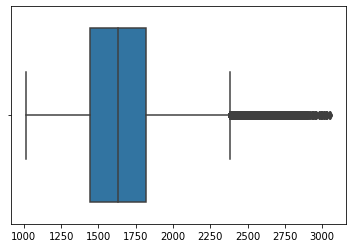

In [6]:
sns.boxplot(data.values)

In [7]:
# проверим пропуски
data['DUQ_MW'].isnull().sum()

0

Text(0, 0.5, 'МВт')

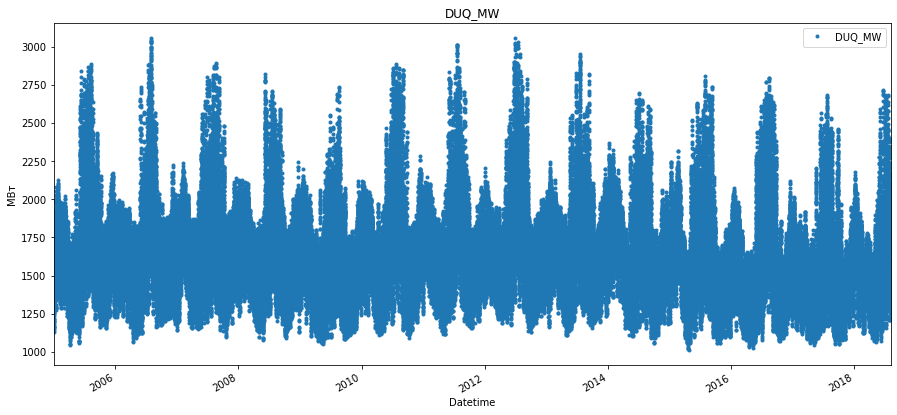

In [8]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ_MW' )
plt.ylabel ( 'МВт' )

In [9]:
data['date'] = data.index
data_2007 = data.loc[np.logical_and( np.logical_and( data['date'].dt.year == 2007 , data['date'].dt.month > 1), data['date'].dt.day > 1  )]

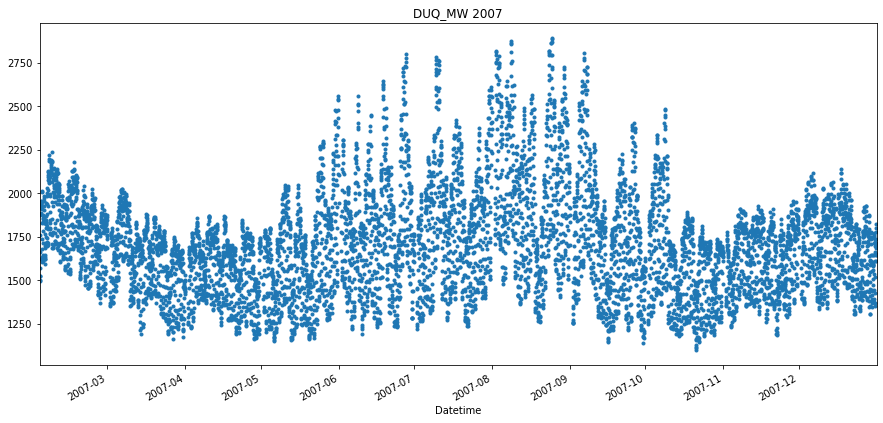

In [10]:
_ = data_2007['DUQ_MW'].plot( style='.', figsize=( 15, 7 ), title='DUQ_MW 2007' )

In [11]:
import pandas_profiling

In [12]:
pandas_profiling.ProfileReport(data)

In [13]:
# Теперь целые
data['DUQ_MW'] = data['DUQ_MW'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 2 columns):
DUQ_MW    119068 non-null int32
date      119068 non-null datetime64[ns]
dtypes: datetime64[ns](1), int32(1)
memory usage: 2.3 MB


In [14]:
ut = data['date'].unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', data.shape[0])

число уникальных значений:    119064  : число наблюдений :  119068


In [15]:
count_data = data['date'].value_counts()
count_data.head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: date, dtype: int64

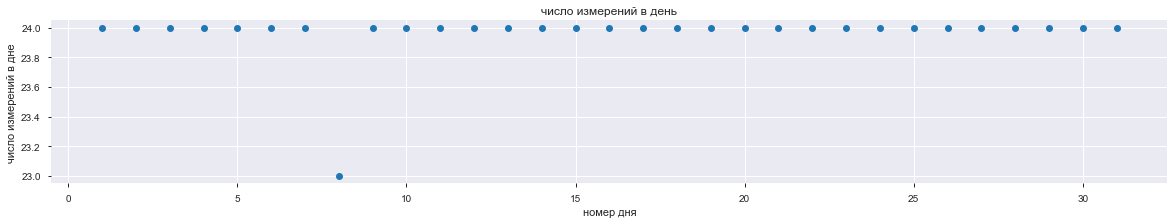

In [16]:
day_H=data['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day

plt.figure(figsize=(20,3))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')

plt.xlabel('номер дня')
plt.ylabel('число измерений в дне')
plt.title('число измерений в день')
plt.show()

In [17]:
Day_count = day_H.value_counts() 
Day_count[Day_count != 24]

8    23
Name: Datetime, dtype: int64

In [18]:
data['2015-03-08 01:00:00':'2015-03-08 06:00:00'].index

DatetimeIndex(['2015-03-08 01:00:00', '2015-03-08 02:00:00',
               '2015-03-08 04:00:00', '2015-03-08 05:00:00',
               '2015-03-08 06:00:00'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

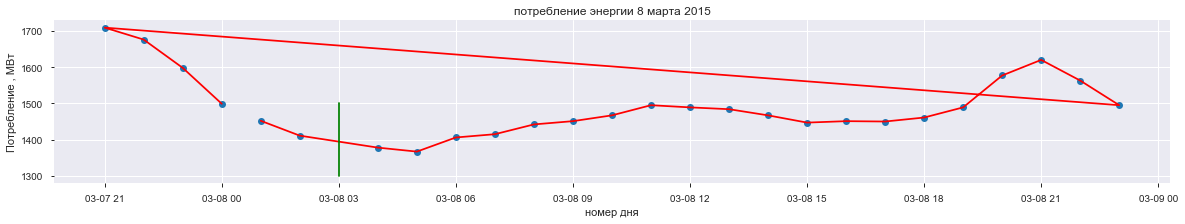

In [19]:
plt.figure(figsize=(20,3))
plt.plot(data['2015-03-07 21:00:00':'2015-03-8 23:00:00'].index,data['2015-03-07 21:00:00':'2015-03-08 23:00:00']['DUQ_MW'].values, 'o')
plt.plot(data['2015-03-07 21:00:00':'2015-03-8 23:00:00'].index,data['2015-03-07 21:00:00':'2015-03-08 23:00:00']['DUQ_MW'].values, 'r')
line_ = pd.to_datetime(pd.Series(['2015-03-08 03:00:00', '2015-03-08 03:00:00']))
plt.plot(line_,np.array([1300,1500]),'g')
plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии 8 марта 2015')

plt.show()

In [20]:
a = data['2014-03-01 00:00:00':'2014-03-31 23:00:00'].index.day.value_counts() 
d2014 = a[a != 24].index
d2014

Int64Index([9], dtype='int64')

### 2. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [21]:
brent = pd.read_excel('data/нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])

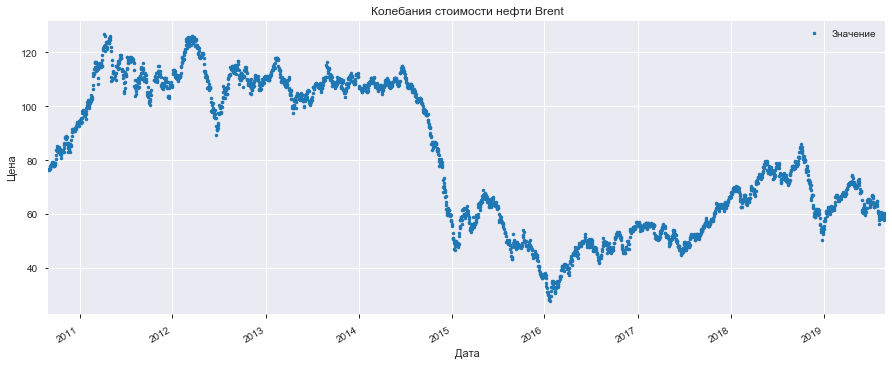

In [22]:
brent.plot(style='.', figsize=(15, 6), title='Колебания стоимости нефти Brent')
plt.ylabel('Цена');

In [23]:
brent['date'] = brent.index

In [24]:
brent['year'] = brent['date'].dt.year
brent['month'] = brent['date'].dt.month
brent['dayofmonth'] = brent['date'].dt.day
brent['quarter'] = brent['date'].dt.quarter
brent['dayofyear'] = brent['date'].dt.dayofyear
brent['weekofyear'] = brent['date'].dt.weekofyear
brent['dayofweek'] = brent['date'].dt.dayofweek
brent['hour'] = brent['date'].dt.hour

In [25]:
brent.head()

,Значение,date,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour
Дата,,,,,,,,,,
2019-09-01,58.84,2019-09-01,2019,9,1,3,244,35,6,0
2019-08-30,59.19,2019-08-30,2019,8,30,3,242,35,4,0
2019-08-29,60.37,2019-08-29,2019,8,29,3,241,35,3,0
2019-08-28,59.84,2019-08-28,2019,8,28,3,240,35,2,0
2019-08-27,59.59,2019-08-27,2019,8,27,3,239,35,1,0


In [26]:
brent.drop(columns='date', inplace=True)
brent.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour
Дата,,,,,,,,,
2019-09-01,58.84,2019,9,1,3,244,35,6,0
2019-08-30,59.19,2019,8,30,3,242,35,4,0
2019-08-29,60.37,2019,8,29,3,241,35,3,0
2019-08-28,59.84,2019,8,28,3,240,35,2,0
2019-08-27,59.59,2019,8,27,3,239,35,1,0


In [27]:
brent.resample("W").mean().head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour
Дата,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.0
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.0
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.0
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.0
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.0


In [28]:
brent.resample("M").mean().head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour
Дата,,,,,,,,,
2010-09-30,78.228148,2010.0,9.0,15.185185,3.0,258.185185,36.925926,2.703704,0.0
2010-10-31,83.473462,2010.0,10.0,16.000000,4.0,289.000000,41.307692,2.846154,0.0
2010-11-30,86.178077,2010.0,11.0,15.346154,4.0,319.346154,45.692308,2.500000,0.0
2010-12-31,92.232308,2010.0,12.0,16.384615,4.0,350.384615,50.115385,2.576923,0.0
2011-01-31,97.033200,2011.0,1.0,16.680000,1.0,16.680000,4.640000,2.760000,0.0


### 3. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

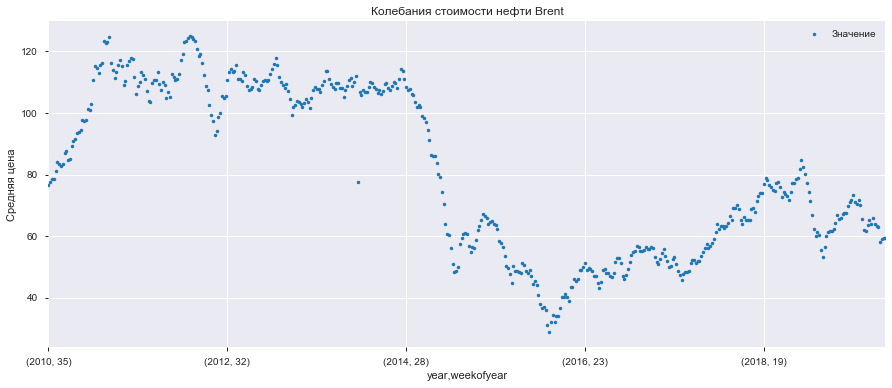

In [29]:
brent.groupby(['year', 'weekofyear']).agg({"Значение": "mean"}).plot(style='.', figsize=(15, 6), title='Колебания стоимости нефти Brent')
plt.ylabel('Средняя цена');

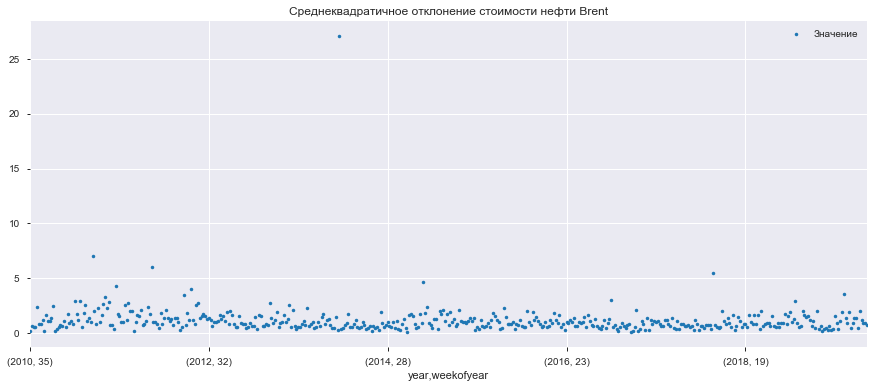

In [30]:
brent.groupby(['year', 'weekofyear']).agg({"Значение": "std"}).plot(style='.', figsize=(15, 6), title='Среднеквадратичное отклонение стоимости нефти Brent');

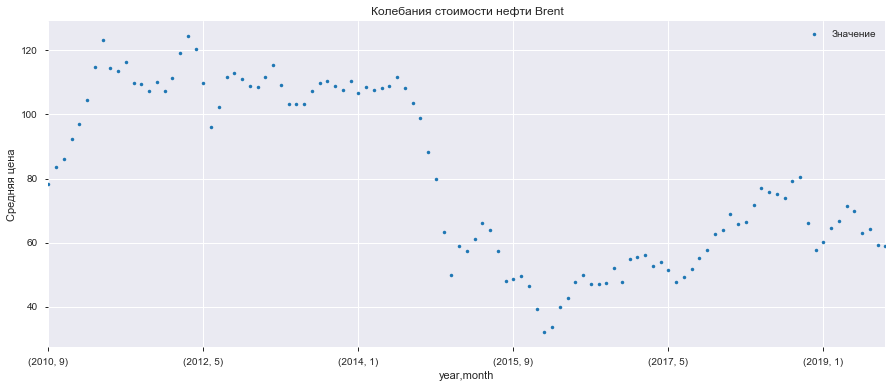

In [31]:
brent.groupby(['year', 'month']).agg({"Значение": "mean"}).plot(style='.', figsize=(15, 6), title='Колебания стоимости нефти Brent')
plt.ylabel('Средняя цена');

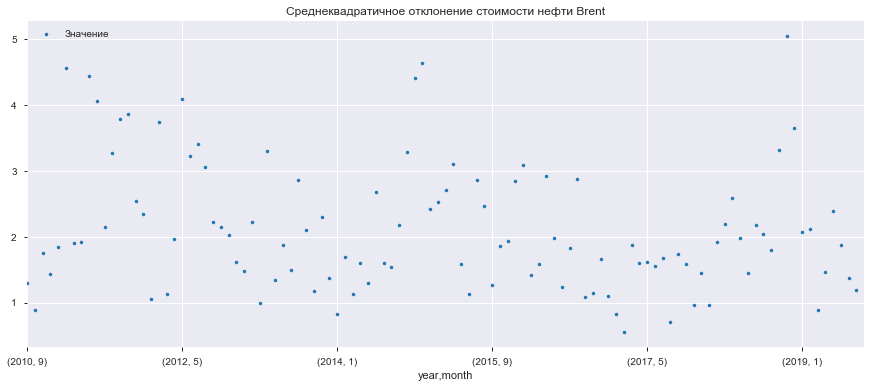

In [32]:
brent.groupby(['year', 'month']).agg({"Значение": "std"}).plot(style='.', figsize=(15, 6), title='Среднеквадратичное отклонение стоимости нефти Brent');

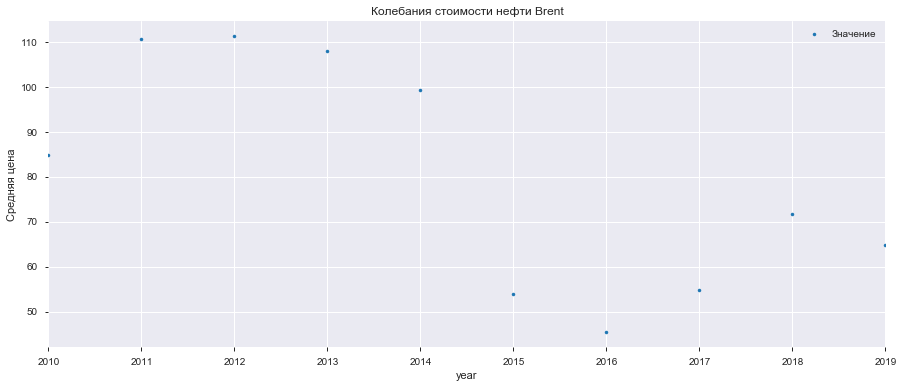

In [33]:
brent.groupby(['year']).agg({"Значение": "mean"}).plot(style='.', figsize=(15, 6), title='Колебания стоимости нефти Brent')
plt.ylabel('Средняя цена');

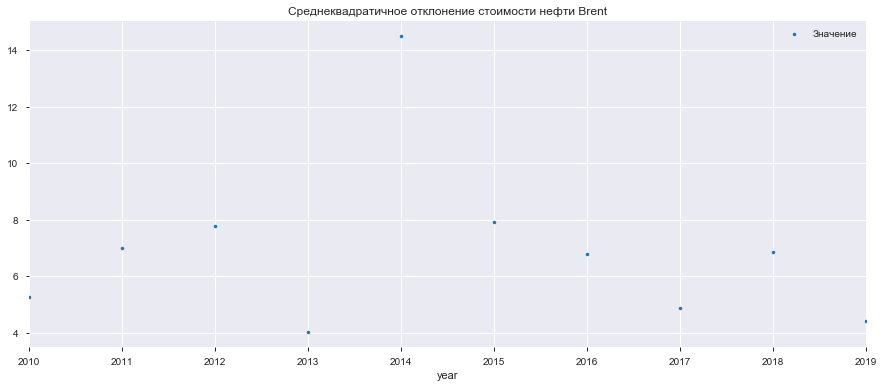

In [34]:
brent.groupby(['year']).agg({"Значение": "std"}).plot(style='.', figsize=(15, 6), title='Среднеквадратичное отклонение стоимости нефти Brent');